### Time Series on Company Stock and Investment - Oil

In [1]:
import pandas as pd
df=pd.read_csv("Company Stock and Investment.csv")

In [2]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
df.shape

(1984, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
Date                       1984 non-null object
Oil Investments            1984 non-null float64
Gold Investments           1984 non-null float64
Comp Stock                 1984 non-null float64
Other sharesInvestments    1984 non-null float64
dtypes: float64(4), object(1)
memory usage: 77.6+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [7]:
import matplotlib.pyplot as plt

In [8]:
df.isnull().sum()
# There are no null data

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

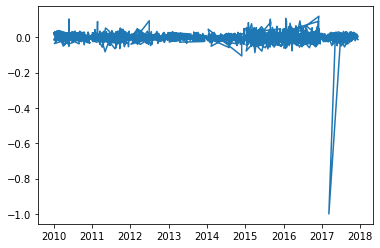

In [10]:
plt.plot(df['Date'], df['Oil Investments'])

From plots we are not able to understand the trend of the data clearly as it is date wise. We will have to group it yearly wise to understand trend

##### Creating different dataframes for different investments

##### Oil Investments

In [9]:
df_oil=df[['Date','Oil Investments']]
df_oil.reset_index(inplace=True,drop=True)
df_oil.head()

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256


In [10]:
oil_group=df_oil.groupby(df_oil['Date'].dt.strftime('%Y'))['Oil Investments'].sum()
oil_group

Date
2009    0.025417
2010    0.194232
2011    0.137869
2012   -0.039730
2013    0.083321
2014   -0.573521
2015   -0.255184
2016    0.488643
2017   -0.924256
Name: Oil Investments, dtype: float64

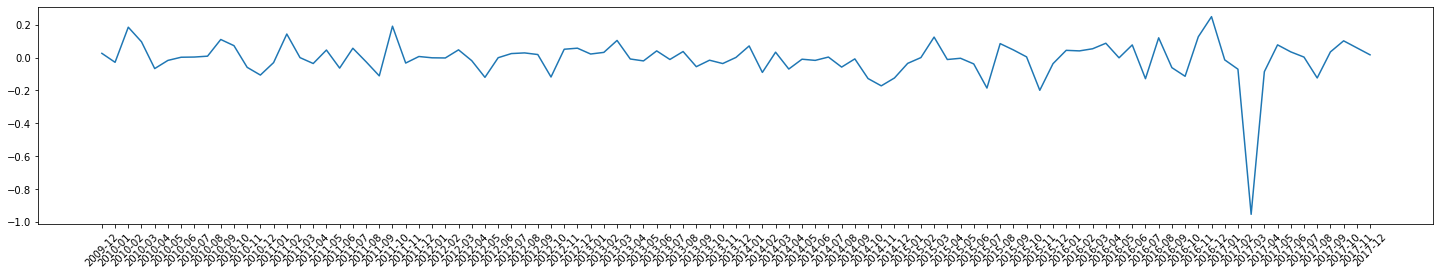

In [11]:
oil_group=df_oil.groupby(df_oil['Date'].dt.strftime('%Y-%m'))['Oil Investments'].sum()

oil_group
plt.figure(figsize=(25,4))
plt.plot(oil_group)

plt.tick_params(axis='x',rotation=45)

##### observations for oil stock
1. The prices of oil and investment in the sector has been almost uniform and has fallen in Feb 2017

##### Checking the stationarity of the data
We need to check the stationarity of the data by visual method of rolling mean and rolling standard deviation and by Dickey Fuller Test

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.DataFrame.rolling(timeseries, window=12).mean()
    rolstd = pd.DataFrame.rolling(timeseries, window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [49]:
## testing for stationarity in Oil data 

In [13]:
oil_group=pd.DataFrame(oil_group)
#.reset_index(inplace=True)
oil_group.reset_index(inplace=True)
oil_group

,Date,Oil Investments
0,2009-12,0.025417
1,2010-01,-0.029126
2,2010-02,0.184326
3,2010-03,0.095769
4,2010-04,-0.067218
...,...,...
92,2017-08,-0.124324
93,2017-09,0.034083
94,2017-10,0.101426
95,2017-11,0.058930


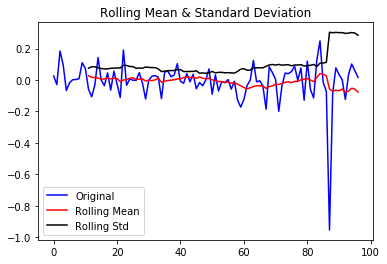

Results of Dickey-Fuller Test:
Test Statistic                -7.126903e+00
p-value                        3.600571e-10
#Lags Used                     2.000000e+00
Number of Observations Used    9.400000e+01
Critical Value (1%)           -3.501912e+00
Critical Value (5%)           -2.892815e+00
Critical Value (10%)          -2.583454e+00
dtype: float64


In [14]:
test_stationarity(oil_group['Oil Investments'])


#### Observations from the graph and test data
1. The rolling mean and rolling standard deviation have variation at the end of period
2. Since p value is less than 0.5, we can are rejecting the null hypothesis and concluding that the data is stationary

##### Finding out the p,q,d value using acf and pacf graphs

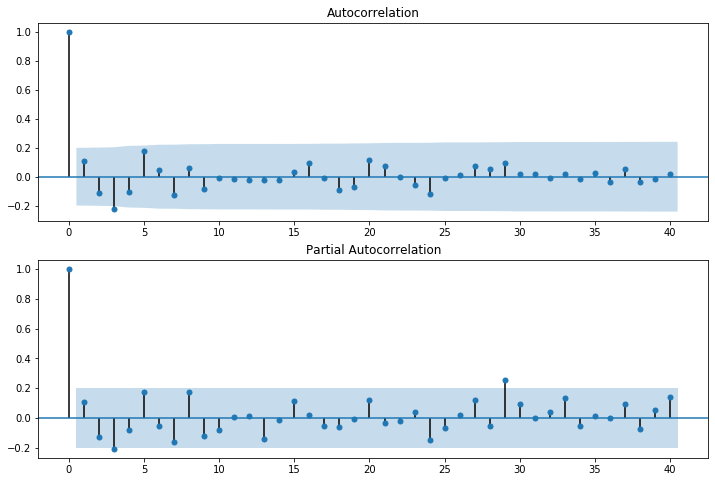

In [16]:

import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(oil_group['Oil Investments'],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(oil_group['Oil Investments'],lags=40,ax=ax2)

#### Determining the values from above graph
1. p value is 1 derived by observing Partial Autocorrelation. The value has dropped suddenly, shut down, from top at x axis at 1.
2. q value is 1 derived by observing Autocorrelation. The value has not dropped gradually, but suddenly at 1 on x axis.
3. d value is 0 as we have not done any removing of seasonality

#### Fitting the SARIMAX model

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm # for sarimax

In [20]:
model=sm.tsa.statespace.SARIMAX(oil_group['Oil Investments'],order=(1,0,1),seasonal_order=(1,0,1,12)) # this order is p, d and q
model_fit=model.fit()
model_fit.summary()

D:\anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                    Oil Investments   No. Observations:                   97
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  67.438
Date:                            Thu, 22 Oct 2020   AIC                           -124.875
Time:                                    16:49:48   BIC                           -112.002
Sample:                                         0   HQIC                          -119.670
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1418      1.942     -0.073      0.942      -3.948       3.664
ma.L1          0.2622      1.865      0.141      0.888      -3.393       3.917
ar.S.L12       0.6618      0.867      0.763      0.445      -1.037       2.361
ma.S.L12      -0.9997    348.123     -0.003      0.998    -683.309     681.309
sigma2         0.0129      4.491      0.003      0.998      -8.790       8.816
===================================================================================
Ljung-Box (Q):                       23.39   Jarque-Bera (JB):              3189.90
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.56   Skew:                            -3.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                    Oil Investments   No. Observations:                   97
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  67.438
Date:                            Thu, 22 Oct 2020   AIC                           -124.875
Time:                                    16:49:56   BIC                           -112.002
Sample:                                         0   HQIC                          -119.670
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1418      1.942     -0.073      0.942      -3.948       3.664
ma.L1          0.2622      1.865      0.141      0.888      -3.393       3.917
ar.S.L12       0.6618      0.867      0.763      0.445      -1.037       2.361
ma.S.L12      -0.9997    348.123     -0.003      0.998    -683.309     681.309
sigma2         0.0129      4.491      0.003      0.998      -8.790       8.816
===================================================================================
Ljung-Box (Q):                       23.39   Jarque-Bera (JB):              3189.90
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.56   Skew:                            -3.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
oil_group.shape

(97, 2)

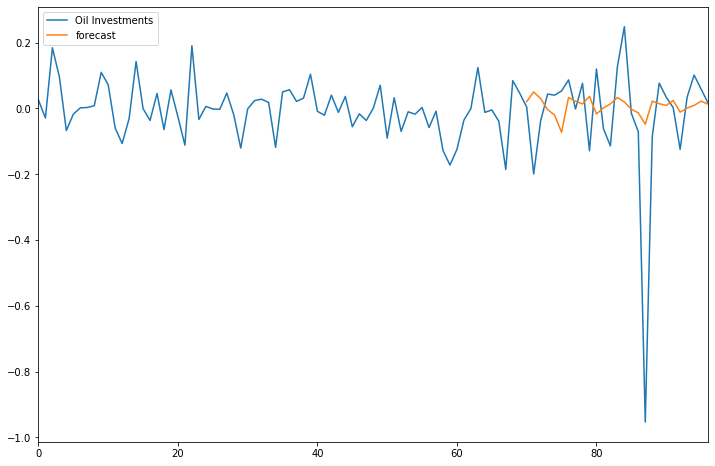

In [23]:
oil_group['forecast']=model_fit.predict(start=70,end=97,dynamic=True)
oil_group[['Oil Investments','forecast']].plot(figsize=(12,8))

In [24]:
# creating some data to predict future of this
from pandas.tseries.offsets import DateOffset



In [25]:
oil_group['Date']=pd.to_datetime(oil_group['Date'])
future_dates=[oil_group.iloc[-1,0]+ DateOffset(months=x)for x in range(0,37)]
future_dates_df=pd.DataFrame(index=future_dates[1:])#,columns=gold_group.columns)
future_dates_df.reset_index(inplace=True)
future_dates_df.rename(columns={'index':'Date'},inplace=True)
future_dates_df

,Date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


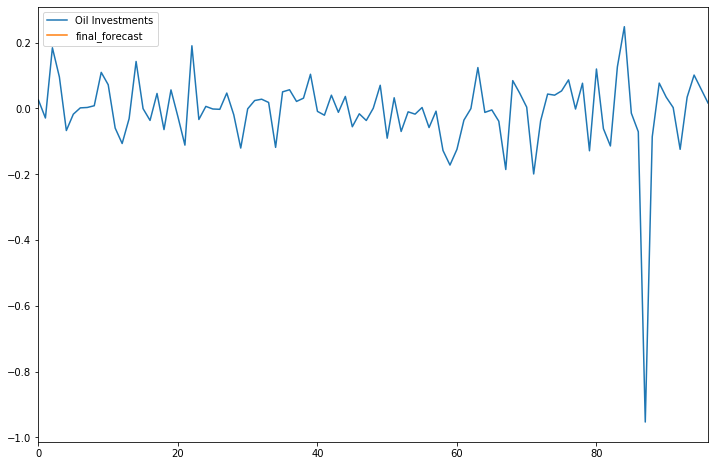

In [26]:
from datetime import datetime
future_dates_df['Date']=future_dates_df['Date'].dt.strftime('%m-%Y')
future_df=pd.concat([oil_group,future_dates_df])
future_df['final_forecast']=model_fit.predict(start=98,end=133)
future_df[['Oil Investments','final_forecast']].plot(figsize=(12,8))

In [ ]:
#### TRYING TO FIT ARIMA AFTER REMOVING IRREGULARITIES

In [27]:
##### let's try removing irregularities from the data
oil_group['First Difference']=oil_group['Oil Investments']-oil_group['Oil Investments'].shift(1)
oil_group['Seasonal Difference']=oil_group['Oil Investments']-oil_group['Oil Investments'].shift(12)

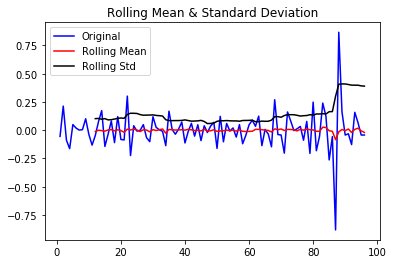

Results of Dickey-Fuller Test:
Test Statistic                -6.933798e+00
p-value                        1.067360e-09
#Lags Used                     6.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


In [29]:
## Again test dickey fuller test
test_stationarity(oil_group['First Difference'].dropna())

D:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


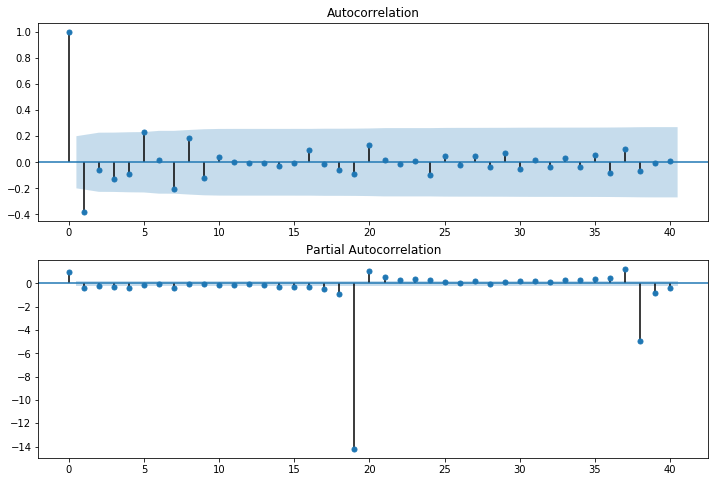

In [33]:

import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(oil_group['First Difference'].iloc[1:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(oil_group['First Difference'].iloc[1:],lags=40,ax=ax2)

In [34]:
model=ARIMA(oil_group['Oil Investments'],order=(1,1,1)) # this order is p, d and q
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  62.245
Method:                       css-mle   S.D. of innovations              0.124
Date:                Thu, 22 Oct 2020   AIC                           -116.490
Time:                        18:09:14   BIC                           -106.233
Sample:                             1   HQIC                          -112.344
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0006      0.000     -1.206      0.231      -0.002       0.000
ar.L1.D.Oil Investments     0.0990      0.102      0.972      0.334      -0.101       0.299
ma.L1.D.Oil Investments    -1.0000      0.027    -37.221      0.000      -1.053      -0.947
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           10.0992           +0.0000j           10.0992            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

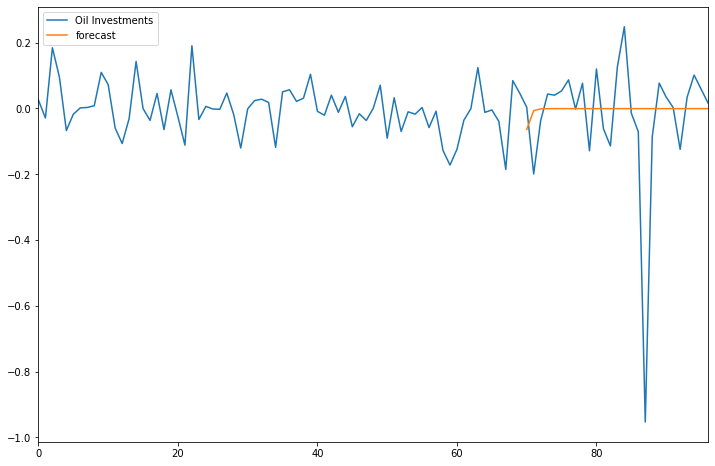

In [35]:
oil_group['forecast']=model_fit.predict(start=70,end=97,dynamic=True)
oil_group[['Oil Investments','forecast']].plot(figsize=(12,8))

In [37]:
### Observation ARIMA is not giving good result after reducing irregularity and lets check SARIMAX again

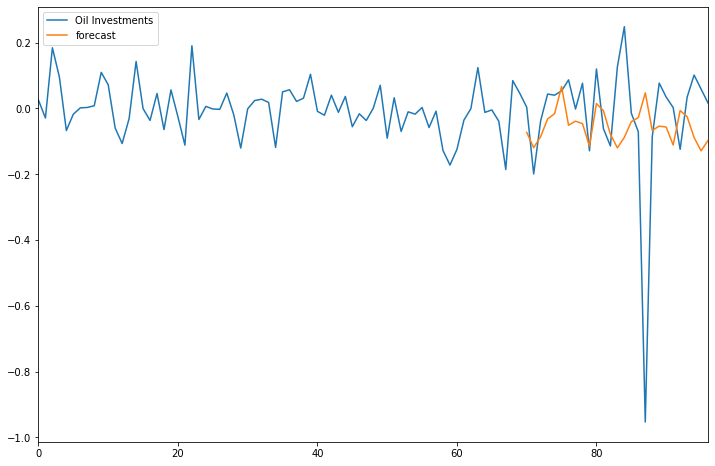

In [38]:
model=sm.tsa.statespace.SARIMAX(oil_group['Oil Investments'],order=(1,1,1),seasonal_order=(1,1,1,12)) # this order is p, d and q
model_fit=model.fit()
model_fit.summary()
oil_group['forecast']=model_fit.predict(start=70,end=97,dynamic=True)
oil_group[['Oil Investments','forecast']].plot(figsize=(12,8))

In [ ]:
## SARIMAX is not giving perfect result after removing irregularities. 

In [39]:
oil_group['Date']=pd.to_datetime(oil_group['Date'])
future_dates=[oil_group.iloc[-1,0]+ DateOffset(months=x)for x in range(0,37)]
future_dates_df=pd.DataFrame(index=future_dates[1:])#,columns=gold_group.columns)
future_dates_df.reset_index(inplace=True)
future_dates_df.rename(columns={'index':'Date'},inplace=True)
future_dates_df

,Date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


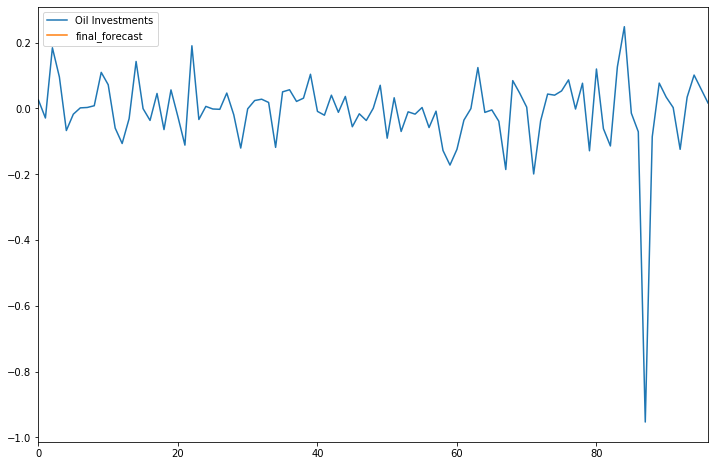

In [40]:
from datetime import datetime
future_dates_df['Date']=future_dates_df['Date'].dt.strftime('%m-%Y')
future_df=pd.concat([oil_group,future_dates_df])
future_df['final_forecast']=model_fit.predict(start=98,end=133)
future_df[['Oil Investments','final_forecast']].plot(figsize=(12,8))